In [90]:
import numpy as np
import cv2
import pickle
from matplotlib import pyplot as plt
from pyzbar.pyzbar import decode
from pyzbar.pyzbar import ZBarSymbol

%matplotlib inline

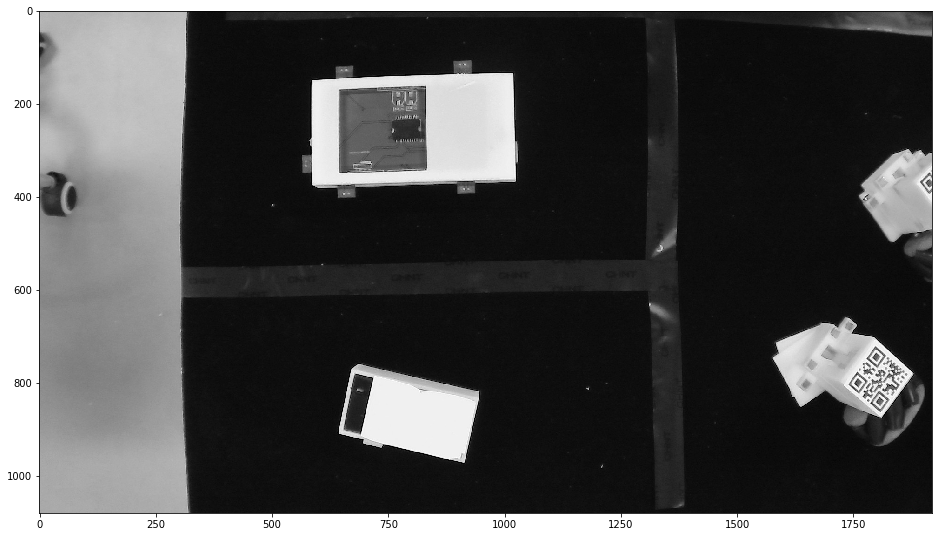

In [82]:
def show(img, cmap=None):
    fig, ax = plt.subplots(figsize=(16, 10))
    ax.imshow(img,cmap)

img = cv2.imread(r'C:\Users\lstyl\Desktop\CE\CV\imgs\2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(img, 'gray')

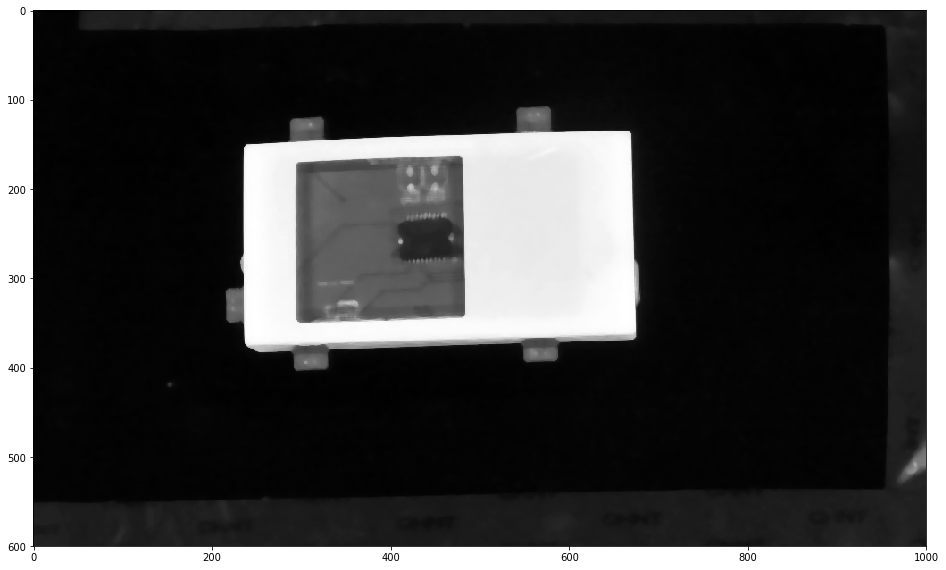

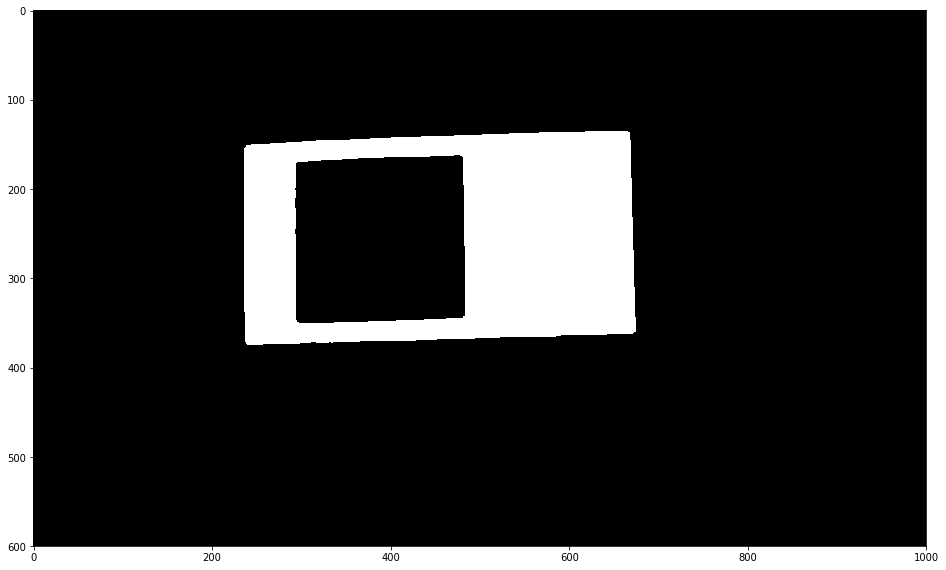

In [97]:
imgsub = img[:600,350:1350]
imgflt = cv2.medianBlur(imgsub, 7)
show(imgflt,'gray')
show(imgflt>210, 'gray')

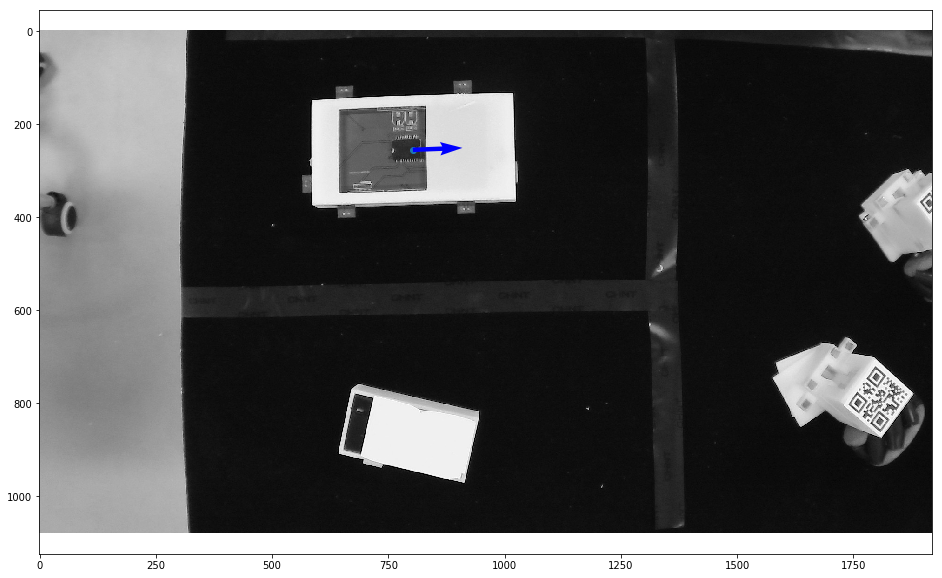

[802.89268606 255.28535298]


In [99]:
# Pick object indices---------------------------------------------------------------
ind = np.argwhere(imgflt>210)
#print(ind)
indf = np.flip(ind,1)
#print(indf)
# OBB------------------------------------------------------------------------------
ca = np.cov(indf,y = None,rowvar = 0,bias = 0)
v, vect = np.linalg.eig(ca)
idx = v.argsort()[::-1]
vect = vect[:,idx]
tvect = np.transpose(vect)
ar = np.dot(indf,np.linalg.inv(tvect))
# get the minimum and maximum x and y 
mina = np.min(ar,axis=0)
maxa = np.max(ar,axis=0)
diff = (maxa - mina)*0.5
# the center is just half way between the min and max xy
center = mina + diff
# get the 4 corners by subtracting and adding half the bounding boxes height and width to the center
corners = np.array([center+[-diff[0],-diff[1]],center+[diff[0],-diff[1]],center+[diff[0],diff[1]],center+[-diff[0],diff[1]],center+[-diff[0],-diff[1]]])
# use the the eigenvectors as a rotation matrix and
# rotate the corners and the centerback
cb_center = np.dot(center,tvect) 
cb_center[0] = cb_center[0] + 350
#print(cb_center)
# Convert to real position
sum1 = 0 # Sum values along the vector 
sum2 = 0
for i in ind:
    if tvect[0].dot(i-cb_center) < 0:
        sum1 = sum1 + img[i[0], i[1]]
    else:
        sum2 = sum2 + img[i[0], i[1]]            
cb_orient = tvect[0] if sum1 > sum2 else -tvect[0]

show(img,'gray')
plt.scatter([cb_center[0]],[cb_center[1]])    
#plt.plot(corners[:,0],corners[:,1],'-')
plt.axis('equal')
plt.quiver(cb_center[0], cb_center[1], cb_orient[0], cb_orient[1], scale_units=None, angles='xy', color='blue', width=0.005)
plt.show()  

print(cb_center)

cb_center[0] = (cb_center[0] - 1920/2)*12.8/1920*558/5
cb_center[1] = -(cb_center[1] - 1080/2)*12.8/1920*558/5 + 98
cb_orient[1] = -cb_orient[1]